In [3]:
#kaggle datasets download -d zalando-research/fashionmnist

In [4]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [5]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [7]:
!kaggle datasets download -d zalando-research/fashionmnist

 84% 58.0M/68.8M [00:00<00:00, 109MB/s] 
100% 68.8M/68.8M [00:00<00:00, 140MB/s]


In [8]:
!unzip /content/fashionmnist.zip

Archive:  /content/fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


Start

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("/content/fashion-mnist_train.csv")

In [11]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [12]:
df.shape

(60000, 785)

In [13]:
x_train = df.iloc[:, 1:].values
y_train = df.iloc[:,0].values

In [14]:
x_train.shape, y_train.shape

((60000, 784), (60000,))

In [15]:
def print_img(img):
  img = img.reshape(28,28)
  plt.imshow(img)

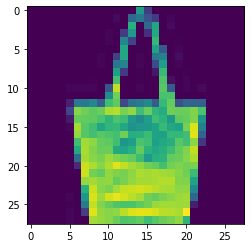

In [16]:
for i in range(10):
  print_img(x_train[i])

In [17]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
y_train = one.fit_transform(y_train.reshape(-1,1)).toarray()
y_train.shape

(60000, 10)

NN

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Model build

In [19]:
model = Sequential()

First Layer

In [20]:
model.add(Dense(units=256, activation='relu', input_dim=784))
model.add(Dropout(rate=0.25))

Hidden Layer

In [21]:
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(rate=0.25))

Output Layer

In [22]:
model.add(Dense(units=10, activation='softmax'))

Model compilation

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model summary

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x_train,y_train,batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 18s 4ms/step - loss: 10.2098 - accuracy: 0.5240 - val_loss: 1.0564 - val_accuracy: 0.6384
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 1.2629 - accuracy: 0.5859 - val_loss: 1.0015 - val_accuracy: 0.6474
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 1.0636 - accuracy: 0.6216 - val_loss: 0.8212 - val_accuracy: 0.6817
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.9392 - accuracy: 0.6511 - val_loss: 0.6970 - val_accuracy: 0.7251
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.8220 - accuracy: 0.6777 - val_loss: 0.6928 - val_accuracy: 0.6852
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.7647 - accuracy: 0.6913 - val_loss: 0.6363 - val_accuracy: 0.7347
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.7664 - accuracy: 0.6892 - val_loss: 0.6448 - val_accuracy: 0.7296
Epoc

In [26]:
model.history.history

{'accuracy': [0.5410208106040955,
  0.5927083492279053,
  0.6274583339691162,
  0.6573125123977661,
  0.6794166564941406,
  0.690666675567627,
  0.6924791932106018,
  0.6968749761581421,
  0.7070208191871643,
  0.7090625166893005,
  0.7147291898727417,
  0.7198749780654907,
  0.7170833349227905,
  0.7201250195503235,
  0.7178333401679993,
  0.7203750014305115,
  0.7222708463668823,
  0.7254166603088379,
  0.7255416512489319,
  0.7265625],
 'loss': [3.3761990070343018,
  1.2239974737167358,
  1.0335524082183838,
  0.9094122648239136,
  0.8057867884635925,
  0.7669414281845093,
  0.7570855021476746,
  0.7458881735801697,
  0.7135290503501892,
  0.7135541439056396,
  0.6955248117446899,
  0.6829969882965088,
  0.6911322474479675,
  0.6867821216583252,
  0.6895779371261597,
  0.6772767305374146,
  0.6738149523735046,
  0.6661015152931213,
  0.6613932847976685,
  0.6559699177742004],
 'val_accuracy': [0.6384166479110718,
  0.6474166512489319,
  0.6816666722297668,
  0.7250833511352539,
  0.

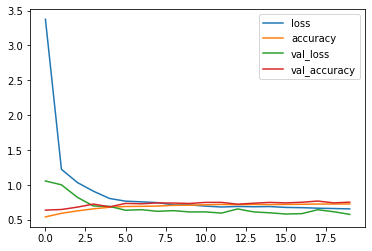

In [27]:
pd.DataFrame(model.history.history).plot()